# Linear SVC Assignment

In [23]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Import the admissions data set (admissions.csv).

In [24]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


### Split the data into training and test sets, with the test set comprising 30% of the data.  Use `'Admitted'` as the target.

In [25]:
X = data.drop('Admitted', axis=1)
y = data['Admitted']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [26]:
svm = SVC(kernel='linear', C=10)
svm.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
print('Training score: ', svm.score(X_train, y_train))
print('Test score: ', svm.score(X_test, y_test))

Training score:  0.8714285714285714
Test score:  0.8666666666666667


### Choose some other values for C and show the difference between the scores for the train and test sets.

In [28]:
c_list = [.01, .1, 1, 5]

c_values = []
train_scores = []
test_scores = []


for i in c_list:
  svm = SVC(kernel='linear', C=i)
  svm.fit(X_train, y_train)
  c_values.append(i)
  train_scores.append(svm.score(X_train, y_train))
  test_scores.append(svm.score(X_test, y_test))


for x, y in zip(c_values, train_scores):
  print(f'Training score for C of {x}: {y}')

for x, y in zip(c_values, test_scores):
  print(f'Testing score for C of {x}: {y}')

Training score for C of 0.01: 0.825
Training score for C of 0.1: 0.8642857142857143
Training score for C of 1: 0.875
Training score for C of 5: 0.8678571428571429
Testing score for C of 0.01: 0.8666666666666667
Testing score for C of 0.1: 0.8666666666666667
Testing score for C of 1: 0.8583333333333333
Testing score for C of 5: 0.8666666666666667


### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [29]:
X = data.drop('SchoolRank', axis=1)
y = data['SchoolRank']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [43]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

print('Training score: ', svm.score(X_train, y_train))
print('Test score: ', svm.score(X_test, y_test))

Training score:  0.6178571428571429
Test score:  0.55


### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

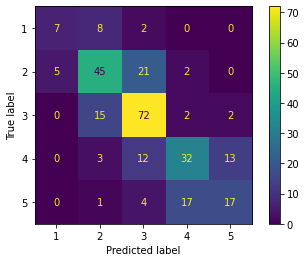

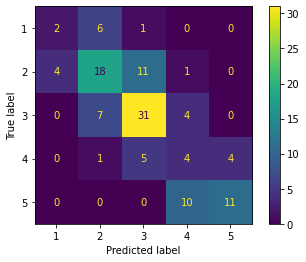

In [55]:
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

plot_confusion_matrix(svm, X_train, y_train)
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

In [45]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.58      0.41      0.48        17
           2       0.62      0.62      0.62        73
           3       0.65      0.79      0.71        91
           4       0.60      0.53      0.57        60
           5       0.53      0.44      0.48        39

    accuracy                           0.62       280
   macro avg       0.60      0.56      0.57       280
weighted avg       0.61      0.62      0.61       280

              precision    recall  f1-score   support

           1       0.33      0.22      0.27         9
           2       0.56      0.53      0.55        34
           3       0.65      0.74      0.69        42
           4       0.21      0.29      0.24        14
           5       0.73      0.52      0.61        21

    accuracy                           0.55       120
   macro avg       0.50      0.46      0.47       120
weighted avg       0.56      0.55      0.55       120

